<h1 align='center'>Covid-19 case Forecasting</h1> 

### # Data Source:- https://www.kaggle.com/sudalairajkumar/covid19-in-india

### # Context
Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

State level data comes from Ministry of Health & Family Welfare

Individual level data comes from covid19india

### # Content
 COVID-19 cases at daily level is present in covid_19_india.csv file

   Individual level details are present in IndividualDetails.csv file and is obtained from this link

   Population at state level is present in population_india_census2011.csv file

   Number of COVID-19 tests at daily level in ICMRTestingDetails.csv file

   Number of hospital beds in each state in present in HospitalBedsIndia.csv file and is extracted from this link

### # Note:- 
 * Data is collected from the Kaggle.
 * It is the data of Covid-19 India last updated in 28/04/20.

## Importing Important libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore the harmless warning 
import warnings
warnings.filterwarnings("ignore")

# 1. Importing dataset:~

In [2]:
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1414 non-null   int64 
 1   Date                      1414 non-null   object
 2   Time                      1414 non-null   object
 3   State/UnionTerritory      1414 non-null   object
 4   ConfirmedIndianNational   1414 non-null   object
 5   ConfirmedForeignNational  1414 non-null   object
 6   Cured                     1414 non-null   int64 
 7   Deaths                    1414 non-null   int64 
 8   Confirmed                 1414 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 99.5+ KB


# 2. Data Cleaning:~

In [4]:
# checking for any missing values
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1409,1410,28/04/20,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,28/04/20,5:00 PM,Tripura,-,-,2,0,2
1411,1412,28/04/20,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,28/04/20,5:00 PM,Uttar Pradesh,-,-,400,31,2043
1413,1414,28/04/20,5:00 PM,West Bengal,-,-,109,20,697


In [6]:
df[df['ConfirmedForeignNational']=='-'].index

Int64Index([ 446,  447,  448,  449,  450,  451,  452,  453,  454,  455,
            ...
            1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413],
           dtype='int64', length=968)

In [7]:
df.shape

(1414, 9)

#### Form above we got some missing values in " - " form. We will fill it with 0 value as there are 968 missing values and we can't remove them in this small dataset.

In [8]:
df['ConfirmedForeignNational'].replace(to_replace='-', value='0',inplace=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [9]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1409,1410,28/04/20,5:00 PM,Telengana,-,0,321,26,1004
1410,1411,28/04/20,5:00 PM,Tripura,-,0,2,0,2
1411,1412,28/04/20,5:00 PM,Uttarakhand,-,0,33,0,51
1412,1413,28/04/20,5:00 PM,Uttar Pradesh,-,0,400,31,2043
1413,1414,28/04/20,5:00 PM,West Bengal,-,0,109,20,697


# 3. Data Visualization:~

In [10]:
data = df.tail(32)
data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1382,1383,28/04/20,5:00 PM,Andaman and Nicobar Islands,-,0,11,0,33
1383,1384,28/04/20,5:00 PM,Andhra Pradesh,-,0,258,31,1259
1384,1385,28/04/20,5:00 PM,Arunachal Pradesh,-,0,1,0,1
1385,1386,28/04/20,5:00 PM,Assam,-,0,27,1,38
1386,1387,28/04/20,5:00 PM,Bihar,-,0,57,2,346
1387,1388,28/04/20,5:00 PM,Chandigarh,-,0,17,0,40
1388,1389,28/04/20,5:00 PM,Chhattisgarh,-,0,32,0,37
1389,1390,28/04/20,5:00 PM,Delhi,-,0,877,54,3108
1390,1391,28/04/20,5:00 PM,Goa,-,0,7,0,7
1391,1392,28/04/20,5:00 PM,Gujarat,-,0,394,162,3548


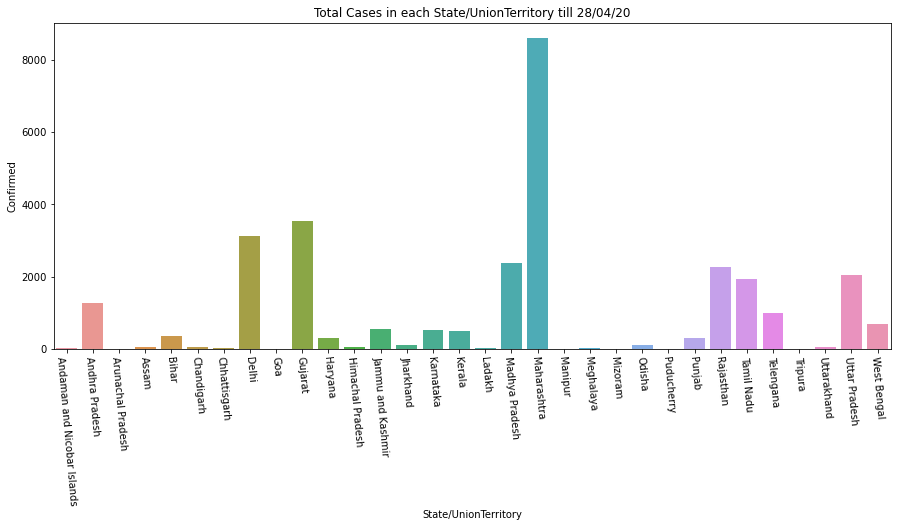

In [11]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "State/UnionTerritory", y = "Confirmed", ax=ax, data=data)
ax.set(title='Total Cases in each State/UnionTerritory till 28/04/20')
plt.xticks(rotation=-85);

In [12]:
a = data[data['Confirmed']>=2000]
a

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1389,1390,28/04/20,5:00 PM,Delhi,-,0,877,54,3108
1391,1392,28/04/20,5:00 PM,Gujarat,-,0,394,162,3548
1399,1400,28/04/20,5:00 PM,Madhya Pradesh,-,0,361,113,2368
1400,1401,28/04/20,5:00 PM,Maharashtra,-,0,1282,369,8590
1407,1408,28/04/20,5:00 PM,Rajasthan,-,0,669,46,2262
1412,1413,28/04/20,5:00 PM,Uttar Pradesh,-,0,400,31,2043


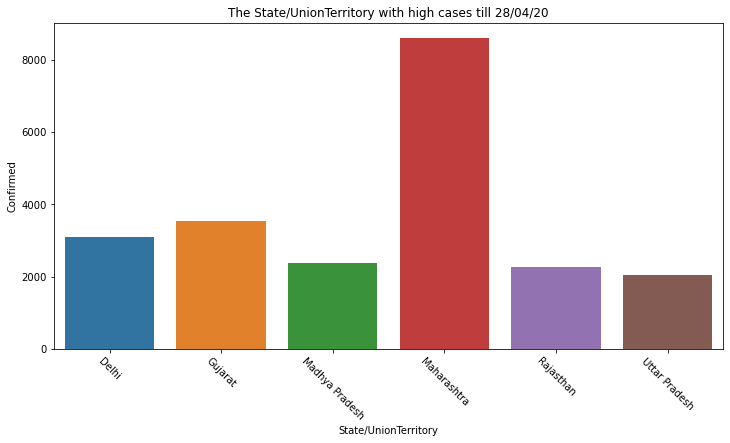

In [13]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "State/UnionTerritory", y = "Confirmed", ax=ax, data=a)
ax.set(title='The State/UnionTerritory with high cases till 28/04/20')
plt.xticks(rotation=-45);

In [14]:
b = data[data['Confirmed']<=10]
b

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1384,1385,28/04/20,5:00 PM,Arunachal Pradesh,-,0,1,0,1
1390,1391,28/04/20,5:00 PM,Goa,-,0,7,0,7
1401,1402,28/04/20,5:00 PM,Manipur,-,0,2,0,2
1403,1404,28/04/20,5:00 PM,Mizoram,-,0,0,0,1
1405,1406,28/04/20,5:00 PM,Puducherry,-,0,3,0,8
1410,1411,28/04/20,5:00 PM,Tripura,-,0,2,0,2


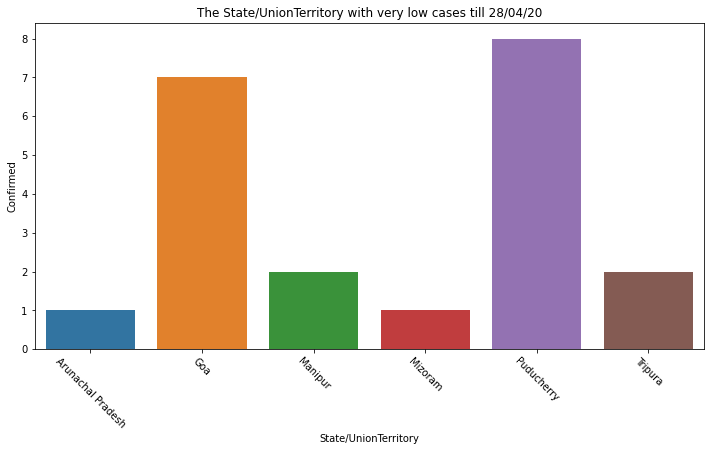

In [15]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "State/UnionTerritory", y = "Confirmed", ax=ax, data=b)
ax.set(title='The State/UnionTerritory with very low cases till 28/04/20')
plt.xticks(rotation=-45);

# 4. Feature Engineering:~

In [16]:
# changing the data type of ConfirmedForeignNational feature
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].apply(lambda x: int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1414 non-null   int64 
 1   Date                      1414 non-null   object
 2   Time                      1414 non-null   object
 3   State/UnionTerritory      1414 non-null   object
 4   ConfirmedIndianNational   1414 non-null   object
 5   ConfirmedForeignNational  1414 non-null   int64 
 6   Cured                     1414 non-null   int64 
 7   Deaths                    1414 non-null   int64 
 8   Confirmed                 1414 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 99.5+ KB


In [17]:
# we will negate the ConfirmedForeignNational from confirmed case for only indian nationals
df['Confirmed'] = df['Confirmed'] - df['ConfirmedForeignNational']
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [18]:
# Dropping unimportant features
df1 = df.drop(['ConfirmedIndianNational','ConfirmedForeignNational','Time','State/UnionTerritory','Sno'],1)
df1.head()

,Date,Cured,Deaths,Confirmed
0,30/01/20,0,0,1
1,31/01/20,0,0,1
2,01/02/20,0,0,2
3,02/02/20,0,0,3
4,03/02/20,0,0,3


In [19]:
# Creating a new column which will negate the total of Cured and Death cases from the total confirmed cases
df1['case'] = df1['Confirmed'] - (df1['Cured'] + df1['Deaths'])

In [20]:
df1.head()

,Date,Cured,Deaths,Confirmed,case
0,30/01/20,0,0,1,1
1,31/01/20,0,0,1,1
2,01/02/20,0,0,2,2
3,02/02/20,0,0,3,3
4,03/02/20,0,0,3,3


In [21]:
df2 = df1.drop(['Cured','Deaths','Confirmed'],1)
df2.head()

,Date,case
0,30/01/20,1
1,31/01/20,1
2,01/02/20,2
3,02/02/20,3
4,03/02/20,3


In [22]:
df3 = df2.copy() # Create a copy of data we want

In [23]:
# This is the most important function which will create a data which will tell total no of cases in each day.
def data():
    df4 = pd.DataFrame()
    date = []
    total_case = []
    for i in range(len(df3)):
        y = df3['Date'][i]       
        if i ==0:
            x = df3['Date'][i]
            a = df3[df2['Date']==x].sum()
            b = a['case']
            date.append(x)
            total_case.append(b)
            i += 1
        else:
            h = df3['Date'][i-1] 
            if(y == h):
                i += 1
            else:
                x = df3['Date'][i]
                z = df3['Date'][i-1]
                a = df3[df3['Date']==x].sum()
                c = df3[df3['Date']==z].sum()
                b = a['case']
                d = c['case']
                e = b-d
                date.append(x)
                total_case.append(e)
                i += 1 
    df4["date"] = date 
    df4["total_case"] = total_case
    return df4

In [24]:
df4 = data()
df4.head()

,date,total_case
0,30/01/20,1
1,31/01/20,0
2,01/02/20,1
3,02/02/20,1
4,03/02/20,0


In [25]:
df5 = df4.copy()

In [26]:
df5['date'] = pd.to_datetime(df5['date'], dayfirst=True)
df5.head()

,date,total_case
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-03,0


In [27]:
data = df5.copy()

In [28]:
data.set_index('date',inplace=True) # set the date column as index

In [29]:
data.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

In [30]:
# setting our frequency of date index as 'D' it indicate we are working on days
data.index.freq = 'D'

In [31]:
data.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

# 5. Pre- steps for the Forcasting:~

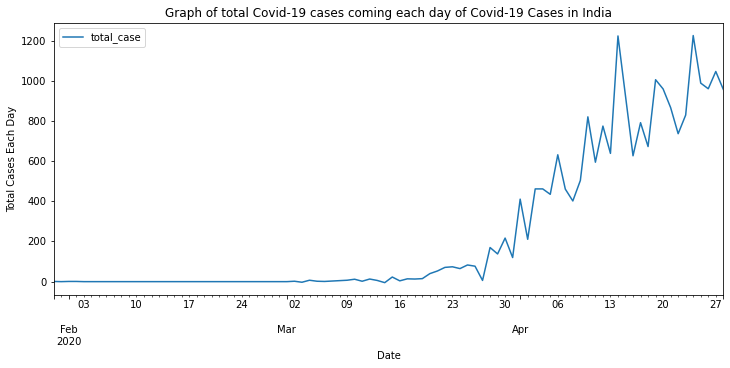

In [32]:
ax = data.plot(figsize=(12,5));
ax.set(title='Graph of total Covid-19 cases coming each day of Covid-19 Cases in India');
ax.set(xlabel = 'Date');
ax.set(ylabel = 'Total Cases Each Day');

#### From above graph it look like Covid-19 Cases increases from the start of April month.

### Run an ETS Decomposition (optional):~

In [33]:
data

,total_case
date,
2020-01-30,1
2020-01-31,0
2020-02-01,1
2020-02-02,1
2020-02-03,0
...,...
2020-04-24,1226
2020-04-25,989
2020-04-26,961


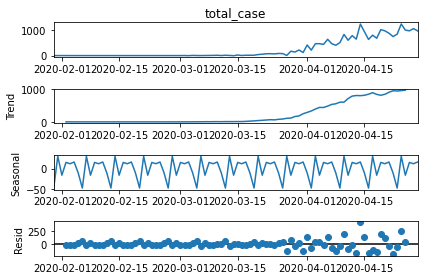

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['total_case'], model='additive')  # model='add' also works
result.plot();

## pmdarima Auto-ARIMA

* install this third-party tool separate from statsmodels if not installed.

    *use !pip install pmdarima

In [35]:
from pmdarima import auto_arima

In [78]:
auto_arima(data['total_case'],seasonal=True,m=30).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   90
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 30)   Log Likelihood                -369.740
Date:                             Sat, 16 May 2020   AIC                            745.481
Time:                                     19:42:53   BIC                            751.713
Sample:                                          0   HQIC                           747.913
                                              - 90                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.9047      7.789      2.042      0.041       0.639      31.171
ma.L1         -0.6637      0.096     -6.894      0.000      -0.852      -0.475
sigma2      1.609e+04   2282.352      7.051      0.000    1.16e+04    2.06e+04
===================================================================================
Ljung-Box (Q):                       24.57   Jarque-Bera (JB):                64.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              23.00   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
len(data)

90

In [47]:
# Set one year for testing
train = data.iloc[:74]
test = data.iloc[74:]

In [48]:
print(train.shape)
print(test.shape)

(74, 1)
(16, 1)


In [49]:
train.head()

,total_case
date,
2020-01-30,1
2020-01-31,0
2020-02-01,1
2020-02-02,1
2020-02-03,0


## Fit a SARIMA(0,1,1) Model

In [105]:
model = SARIMAX(train['total_case'],order=(0, 1, 1), seasonal_order= (0, 3, 0, 30))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          total_case   No. Observations:                   74
Model:             SARIMAX(0, 1, 1)x(0, 3, [], 30)   Log Likelihood                   0.000
Date:                             Sat, 16 May 2020   AIC                              4.000
Time:                                     19:55:21   BIC                                nan
Sample:                                 01-30-2020   HQIC                               nan
                                      - 04-12-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [106]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

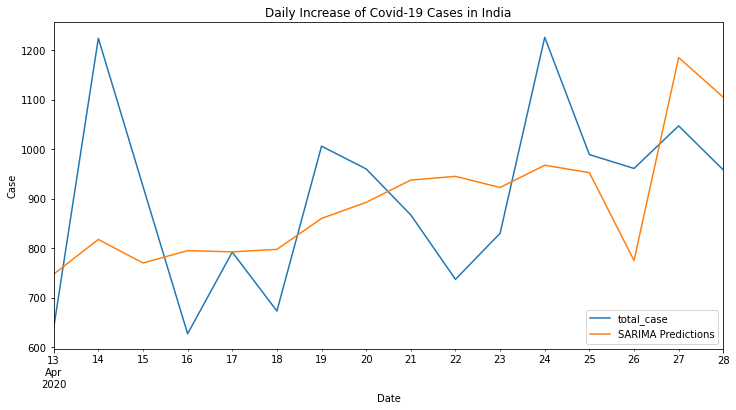

In [107]:
# Plot predictions against known values
title = 'Daily Increase of Covid-19 Cases in India'
ylabel='Case'
xlabel='Date'

ax = test['total_case'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [108]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['total_case'], predictions)
print(f'SARIMA MSE Error: {error:11.10}')

SARIMA MSE Error:  29426.8859


In [109]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['total_case'], predictions)
print(f'SARIMA RMSE Error: {error:11.10}')

SARIMA RMSE Error: 171.5426649


# 6. Forcasting:~

In [110]:
model = SARIMAX(data['total_case'],order=(0, 1, 1), seasonal_order= (0, 3, 0, 30))
results = model.fit()
fcast = results.predict(len(data),len(data)+30,typ='levels').rename('SARIMA Forecast')

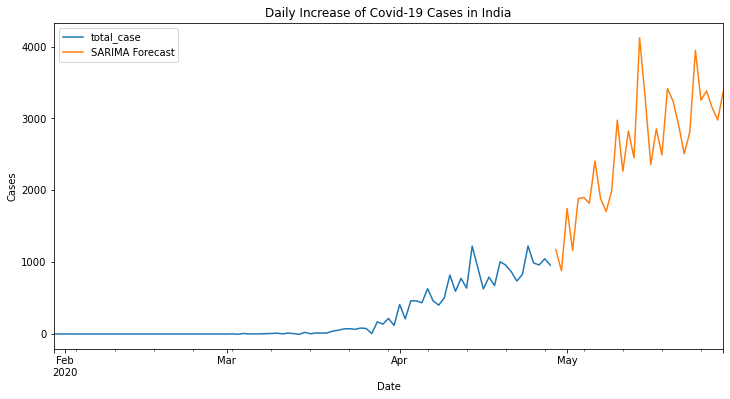

In [111]:
# Plot predictions against known values
title = 'Daily Increase of Covid-19 Cases in India'
ylabel='Cases'
xlabel='Date'

ax = data['total_case'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [112]:
fcast

2020-04-29    1171.399907
2020-04-30     879.400203
2020-05-01    1747.399341
2020-05-02    1162.399901
2020-05-03    1884.399233
2020-05-04    1899.399193
2020-05-05    1821.399266
2020-05-06    2406.398691
2020-05-07    1887.399220
2020-05-08    1704.399413
2020-05-09    1995.399147
2020-05-10    2976.398116
2020-05-11    2265.398882
2020-05-12    2826.398286
2020-05-13    2451.398606
2020-05-14    4122.397075
2020-05-15    3282.397820
2020-05-16    2358.398794
2020-05-17    2856.398291
2020-05-18    2493.398664
2020-05-19    3417.397865
2020-05-20    3240.398107
2020-05-21    2907.398530
2020-05-22    2508.398944
2020-05-23    2814.398593
2020-05-24    3948.397549
2020-05-25    3255.398212
2020-05-26    3384.397728
2020-05-27    3150.398782
2020-05-28    2979.398793
2020-05-29    3382.598528
Freq: D, Name: SARIMA Forecast, dtype: float64

### * We have got a straight line for next month.

#### I don't say it will be the case for next month because:- 
* It is a new virus so we don't have enough data for forecasting.
* I used this Data for Practice.

<h1 align='center'>*----E N D----*</h1>